###  Breast Cancer DataSet 
The dataset given here is about the patients who were detected with 2 kinds of breast cancer:
1. Malignant or 
2. Benign 

The features given here are the characteristics of the cell nuclei computed from the fine needle aspirate(FNA) of a breast mass. 

Ten real-valued features are computed for each cell nucleus as follows:
```
radius (mean of distances from center to points on the perimeter)
texture (standard deviation of gray-scale values)
perimeter
area
smoothness (local variation in radius lengths)
compactness (perimeter^2 / area - 1.0)
concavity (severity of concave portions of the contour)
concave points (number of concave portions of the contour)
symmetry
fractal dimension ("coastline approximation" - 1)

```
Mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

In [3]:
# Importing Libraries:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
# import the data

data = pd.read_csv('input/data.csv')


### Doing Spot checks with data

In [5]:
# Overall view of the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
# Checking the first few rows:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed:32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# Target Variable:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

#### Summary of Numeric Columns:

In [8]:
data.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed:32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


- There are no null values
- id and Unnamed: 32 are not required columns. So we will get rid of those.
- There are two outcomes - Benign Tumor (which spreads locally) Malignant Tumor (which can spread throughout the whole body via blood)

In [9]:
# Dropping some of the unwanted variables:
data.drop('id',axis=1,inplace=True)
data.drop('Unnamed:32',axis=1,inplace=True)

In [10]:
# Binarizing the target variable:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

Important: The data is highly variable and any feature with low variance will be neglected. We will scale the data to allow more predictive power. 
Here we are standardizing the dataset - meaning shifting the distribution to have mean of zero and standard deviation of unit variance

In [11]:
data_scaled = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
data_scaled.columns = list(data.iloc[:,1:32].columns)

# add the diagnosis column
data_scaled['diagnosis'] = data['diagnosis']

In [12]:
# Lets double check if the mean and std are zero
print data_scaled['texture_mean'].std()
print data_scaled['texture_mean'].mean()

1.00087989458
1.0497363572e-16


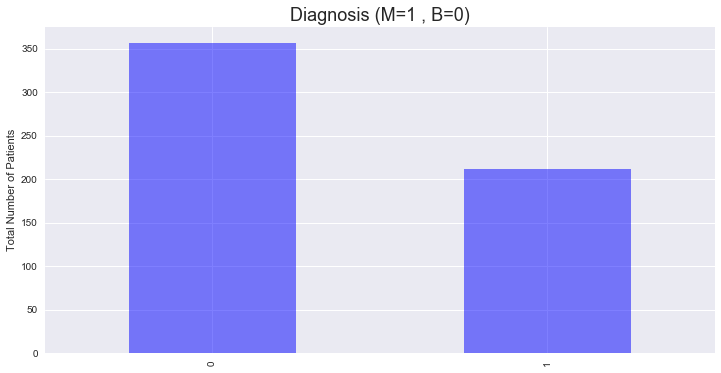

In [13]:
#Looking at the number of patients with Malignant and Benign Tumors:
data_scaled.diagnosis.value_counts().plot(kind='bar', alpha = 0.5, facecolor = 'b', figsize=(12,6))
plt.title("Diagnosis (M=1 , B=0)", fontsize = '18')
plt.ylabel("Total Number of Patients")
plt.grid(b=True)


###### - ~60% - 65% of the patients had Benign tumor while the rest of them had Malignant.

In [14]:
data.columns

Index([u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave_points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave_points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave_points_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object')

In [15]:
data_mean = data_scaled[['diagnosis','radius_mean','texture_mean','perimeter_mean',
                  'area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave_points_mean', 
                  'symmetry_mean', 'fractal_dimension_mean']]

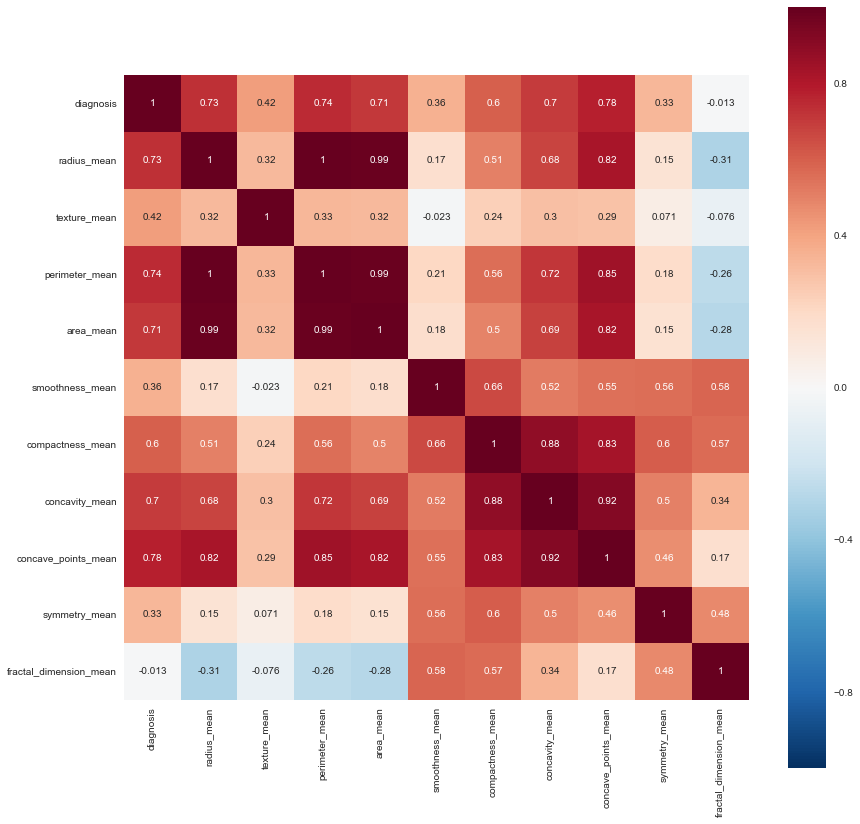

In [16]:
plt.figure(figsize=(14,14))
foo = sns.heatmap(data_mean.corr(), vmax=1, square=True, annot=True)

- radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave points_mean show high correlation with the diagnosis.
- The other variables do not really show high impact over diagnoses.

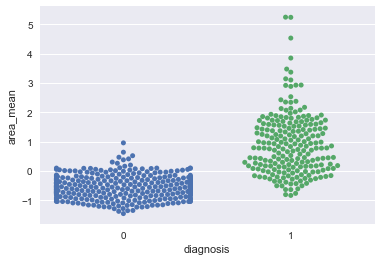

In [17]:
_ = sns.swarmplot(y='area_mean',x='diagnosis', data=data_mean)
plt.show()

In [18]:
data_drop_list = ['radius_mean', 'perimeter_mean', 'concave_points_mean']
data_scaled.drop(data_drop_list, axis=1, inplace=True)

In [19]:
data_scaled = data_scaled[[col for col in data_scaled.columns if 'mean' in col]]
#data["diagnosis"]

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

predictors = data_scaled.columns[1:11]
target = data["diagnosis"]

X = data_scaled
y = data["diagnosis"]

# Split the dataset in train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ('Shape of training set : %i || Shape of test set : %i' % (X_train.shape[0],X_test.shape[0]) )
print ('The dataset is very small so simple cross-validation approach should work here')
print ('There are very few data points so 10-fold cross validation should give us a better estimate')

Shape of training set : 455 || Shape of test set : 114
The dataset is very small so simple cross-validation approach should work here
There are very few data points so 10-fold cross validation should give us a better estimate


### Logistic Regression

In [21]:
# Importing the model:
from sklearn.linear_model import LogisticRegression

# Initiating the model:
lr = LogisticRegression()

scores = cross_val_score(lr, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 93.19


### KNN

In [22]:
# Importing the model:
from sklearn.neighbors import KNeighborsClassifier

# Initiating the model:
knn = KNeighborsClassifier()

scores = cross_val_score(knn, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 95.37


### Decision Tree

In [23]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()

scores = cross_val_score(dt, X_train, y_train, scoring='accuracy' ,cv=10).mean()
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))


The mean accuracy with 10 fold cross validation is 90.98


### Random Forest

In [24]:
# Importing the model:
from sklearn.ensemble import RandomForestClassifier

# Initiating the model:
rf = RandomForestClassifier()

scores = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 94.96


###### Random Forest, and KNN looks to perform better. Lets try to fine tune the parameters and see if we can get any improvisation.


In [25]:
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    print("N = " + str(i) + " :: Score = " + str(round(score,2)))

N = 1 :: Score = 0.92
N = 2 :: Score = 0.93
N = 3 :: Score = 0.94
N = 4 :: Score = 0.95
N = 5 :: Score = 0.95
N = 6 :: Score = 0.95
N = 7 :: Score = 0.95
N = 8 :: Score = 0.94
N = 9 :: Score = 0.94
N = 10 :: Score = 0.94
N = 11 :: Score = 0.94
N = 12 :: Score = 0.94
N = 13 :: Score = 0.94
N = 14 :: Score = 0.94
N = 15 :: Score = 0.94
N = 16 :: Score = 0.94
N = 17 :: Score = 0.94
N = 18 :: Score = 0.94
N = 19 :: Score = 0.94
N = 20 :: Score = 0.94


#### The default number of trees is 10. However, lets try running Random Forest for different values of trees:

In [26]:
for i in range(1, 21):
    rf = RandomForestClassifier(n_estimators = i)
    score = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    print("N = " + str(i) + " :: Score = " + str(round(score,2)))

N = 1 :: Score = 0.89
N = 2 :: Score = 0.89
N = 3 :: Score = 0.94
N = 4 :: Score = 0.91
N = 5 :: Score = 0.91
N = 6 :: Score = 0.93
N = 7 :: Score = 0.95
N = 8 :: Score = 0.93
N = 9 :: Score = 0.94
N = 10 :: Score = 0.93
N = 11 :: Score = 0.94
N = 12 :: Score = 0.94
N = 13 :: Score = 0.93
N = 14 :: Score = 0.95
N = 15 :: Score = 0.94
N = 16 :: Score = 0.94
N = 17 :: Score = 0.94
N = 18 :: Score = 0.94
N = 19 :: Score = 0.93
N = 20 :: Score = 0.94


In [27]:
from sklearn.ensemble import RandomForestClassifier


# Initiating the model:
rf = RandomForestClassifier(n_estimators=10)

rf = rf.fit(X_train, y_train)

predicted = rf.predict(X_test)

acc_test = metrics.accuracy_score(y_test, predicted)

print ('The accuracy on test data is %s' % (round(acc_test,2)))

The accuracy on test data is 0.96


In [28]:
import pickle as pkl 
pkl.dump(rf, open("model.pkl", "wb" ))

In [29]:
print X_train.iloc[1,:]

texture_mean              0.626063
area_mean                -0.838979
smoothness_mean          -0.594251
compactness_mean         -0.889033
concavity_mean           -0.661136
symmetry_mean             0.746185
fractal_dimension_mean   -0.429195
Name: 427, dtype: float64


In [30]:
rf.predict([X_train.iloc[1,:]])[0]

0

In [35]:
#fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted, pos_label=1)

In [39]:
[X_train.iloc[1,:]]

[texture_mean              0.626063
 area_mean                -0.838979
 smoothness_mean          -0.594251
 compactness_mean         -0.889033
 concavity_mean           -0.661136
 symmetry_mean             0.746185
 fractal_dimension_mean   -0.429195
 Name: 427, dtype: float64]